# Exploratory Data Analysis

## Notes

Exploratory Data Analysis (EDA) is about understanding our data.
- Use **descriptive statistics** to summarize our data.
- See how our data are distributed and how they are correlated.
- Indentify outliers, missing values, duplicate values, data types.
- Discover patterns in the data.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Read Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Data Assessment

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
(train.columns == 'SalePrice').any()

True

In [8]:
(test.columns == 'SalePrice').any()

False

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [11]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1086,1087,160,RM,NaN,1974,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,83500
1342,1343,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,228500
177,178,50,RL,NaN,13650,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,172500
628,629,60,RL,70.0,11606,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Family,135000
980,981,85,RL,NaN,12122,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,178400
516,517,80,RL,NaN,10448,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,8,2009,COD,Abnorml,158000
506,507,60,RL,80.0,9554,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,215000
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
1285,1286,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,132500
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000


In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


38 out of 81 columns have numerical values.

From these 36 columns, one column is the SalePrice and one column is the Id.

So, basically there are 36 numerical attributes.

The rest 43 attributes contain categorical data.

#### Drop Id column

In [14]:
train_clean = train.copy()

In [15]:
train_clean.drop('Id', axis=1, inplace=True)

In [16]:
train_clean.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


### Numeric data

In [17]:
train_numeric = train_clean.select_dtypes(include=np.number)
train_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Categorical data

In [18]:
train_cat = train_clean.select_dtypes(exclude=np.number)
train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Missing Values

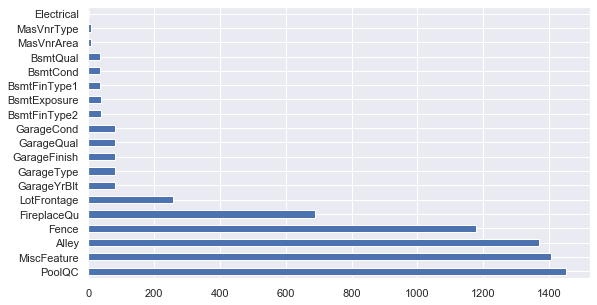

In [19]:
# find missing values
missing = train_clean.isnull().sum()
missing[missing>0].sort_values(ascending=False).plot.barh(figsize=(9,5));

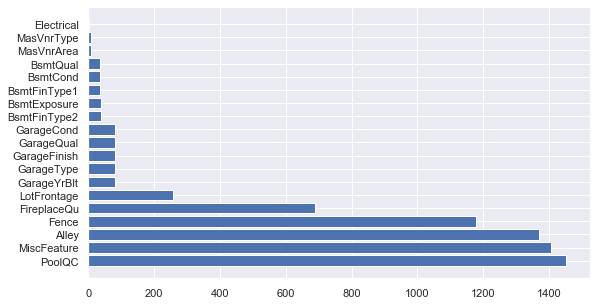

In [20]:
plt.figure(figsize=(9,5))
plt.barh(missing[missing>0].sort_values(ascending=False).index,
         missing[missing>0].sort_values(ascending=False).values);

In [21]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

#https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [22]:
missing_table = missing_values_table(train_clean)
missing_table

Your selected dataframe has 80 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [23]:
train_clean[train_clean.PoolQC.notnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [24]:
train_clean.PoolQC[train_clean.PoolQC.notnull()]

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [25]:
train_clean.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

#### Missing values for numeric data

In [26]:
missing_values_table(train_numeric)

Your selected dataframe has 37 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,259,17.7
GarageYrBlt,81,5.5
MasVnrArea,8,0.5


In [27]:
# nan values means no garaze
(train_clean.GarageYrBlt.isnull() == train_clean.GarageType.isnull()).any()

True

In [28]:
# this indicates the size of the garaze. 0 cars means no garaze. These 81 values is due to absense of garaze.
(train_clean.GarageCars==0).sum()

81

**Notes**

For the numeric features:
- Replace NaN values of the GarageYrBlt with zero.
- Impute median values to LotFrontage	and MasVnrArea missing values.

### Handle missing values

#### Numeric data

### Duplicates

In [29]:
# find duplicates
train_clean.duplicated().sum()

0

### Temporal Data

These are data related to time.

#### Yearly temporal Data

In [30]:
# list of features that contain temporal data related to year
year_attr = [attr for attr in train_clean.columns if 'Yr' in attr or 'Year' in attr]
year_attr

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [31]:
for attr in year_attr:
    print(attr, '\n' ,train_clean[attr].unique())

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

In [32]:
train_clean.YearBuilt.min(), train_clean.YearBuilt.max()

(1872, 2010)

#### Distributions of the yearly temporal data

C:\Users\georg\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\georg\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


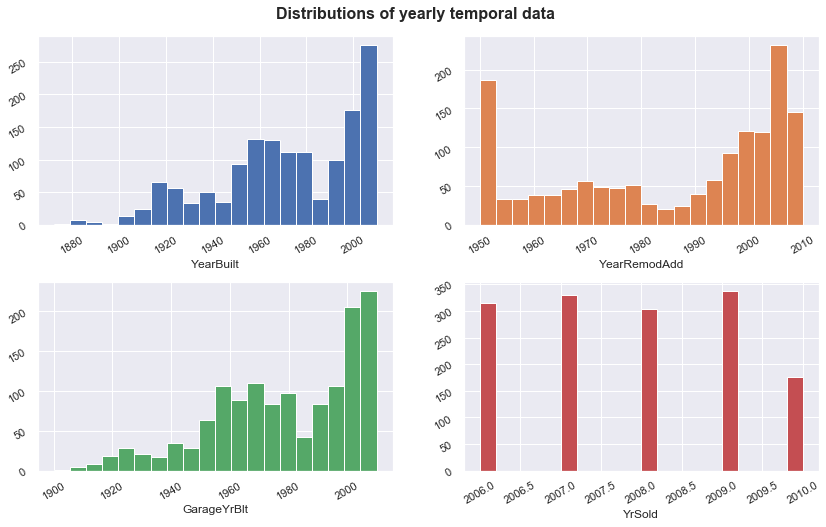

In [33]:
i = 0
j = 0
k = 0
fig, ax = plt.subplots(2,2, figsize=(14,8))
fig.suptitle('Distributions of yearly temporal data', fontsize=16, fontweight = 'bold', y=0.93)
fig.subplots_adjust(hspace=0.3)
for attr in year_attr:
    ax[i,j].hist(train_clean[attr], bins=20, color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr)
    ax[i,j].tick_params(labelrotation=30)
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

Year Remodeling:
- We can see a lot of remodeling the year 1950. Maybe some new regulations took place at 1950 and older houses had to be renovated?

Garaze Year Built:
- We can see a sudden drop after 1980. We also see a sudden drop at the Year Built which can explain that sudden drop.

#### Relationship of yearly temporal data with sale price

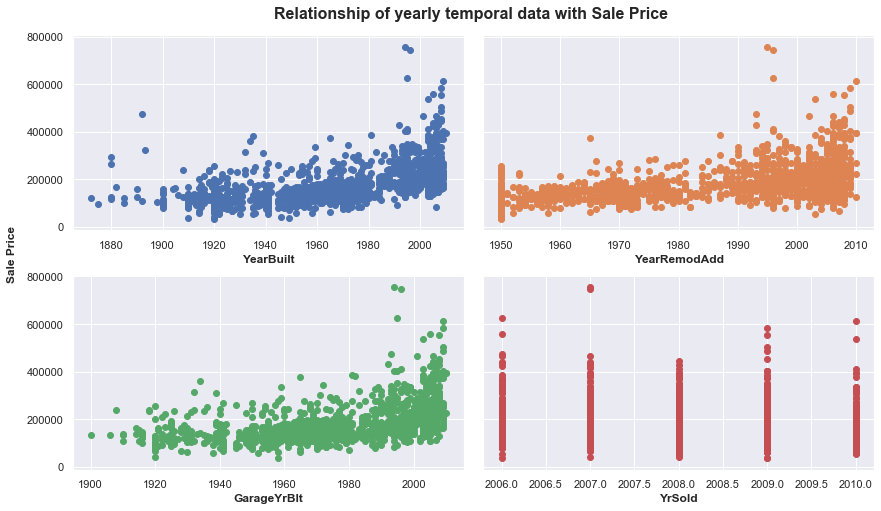

In [34]:
i = 0
j = 0
k = 0
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True)
fig.suptitle('Relationship of yearly temporal data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in year_attr:
    ax[i,j].scatter(train_clean[attr], train_clean['SalePrice'], color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

**Notes**

We can see a slight positive correlation:
- Between YearBuilt and SalePrice
- Between GarazeYrBlt and SalePrice
- Between YearRemodAdd and SalePrice

We can see various outliers between the yearly temporal data and the sales price.
- Remove outliers.

#### Correlation of yearly temporal data with sale price

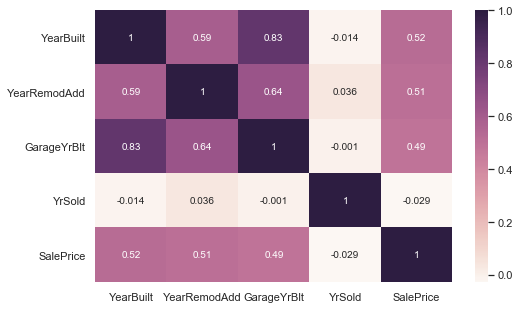

In [35]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False, dark = 0.15, light = 0.97, hue = 0.9)
plt.figure(figsize=(8,5))
sns.heatmap(train_clean[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice']].corr(), cmap=cmap, annot=True);

In [36]:
train_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

There is also another temporal feature: MoSold (Month Sold). Let's assess that.

#### Monthly temporal data

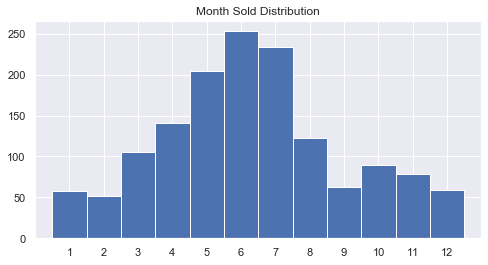

In [37]:
plt.figure(figsize=(8,4))
bins = np.arange(14)-0.5
plt.hist(train_clean.MoSold, bins)
plt.xticks(range(1,13))
plt.title('Month Sold Distribution')
plt.xlim([0, 13]);
#https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram

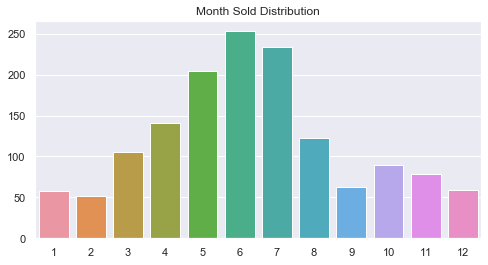

In [38]:
# Using seaborn instead
plt.figure(figsize=(8,4))
sns.countplot(train_clean.MoSold)
plt.title('Month Sold Distribution')
plt.ylabel('')
plt.xlabel('');

Most sales take place the months June and July, followed by May.

#### Relationship of monthly temporal data with sale price

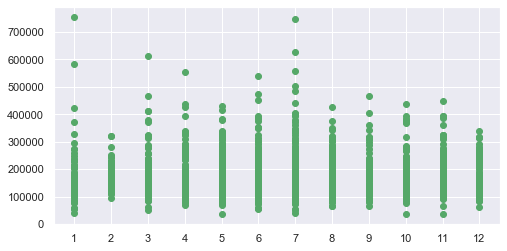

In [39]:
plt.figure(figsize=(8,4))
plt.scatter(train_clean['MoSold'], train_clean['SalePrice'], color=sns.color_palette()[2])
plt.xticks(range(1,13));

In [40]:
train_clean[['MoSold', 'SalePrice']].corr()

,MoSold,SalePrice
MoSold,1.000000,0.046432
SalePrice,0.046432,1.000000


There is no correlation between month sold and sale price.

### Numeric Data

Now, let's assess all the numeric data.

In [41]:
train_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

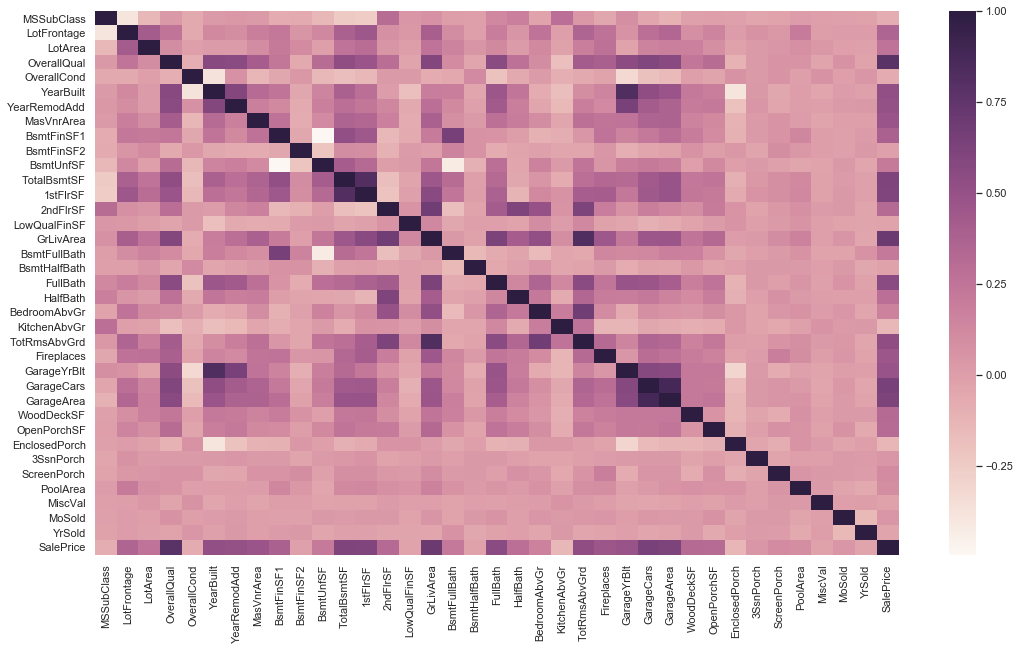

In [42]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False, dark = 0.15, light = 0.97, hue = 0.9)
#cmap = 'viridis'
plt.figure(figsize=(18,10))
sns.heatmap(train_numeric.corr(), cmap=cmap, annot=False);

#### Zoom in heatmap for numeric data

In [43]:
corr_numeric = train_numeric.corr()

In [44]:
#plt.figure(figsize=(12,6))
#sb.heatmap(corr_numeric[((corr_numeric>0.6) | (corr_numeric<-0.6)) & (corr_numeric!=1)]);

In [45]:
corr_numeric.sort_values('SalePrice').head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenAbvGr,0.281721,-0.006069,-0.017784,-0.183882,-0.087001,-0.174800,-0.149598,-0.037610,-0.081007,-0.040751,...,-0.090130,-0.070091,0.037312,-0.024600,-0.051613,-0.014525,0.062341,0.026589,0.031687,-0.135907
EnclosedPorch,-0.012037,0.010700,-0.018340,-0.113937,0.070356,-0.387268,-0.193919,-0.110204,-0.102303,0.036543,...,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578


We see that the negative correlations with the Sale Price are very small. Now, let's check the positive correlations.

In [46]:
# sort correlation matrix by SalePrice descending
corr_numeric_high = corr_numeric.sort_values('SalePrice', ascending=False).head(11)
corr_numeric_high

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [47]:
corr_numeric_high = corr_numeric_high[corr_numeric_high.index]
corr_numeric_high

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


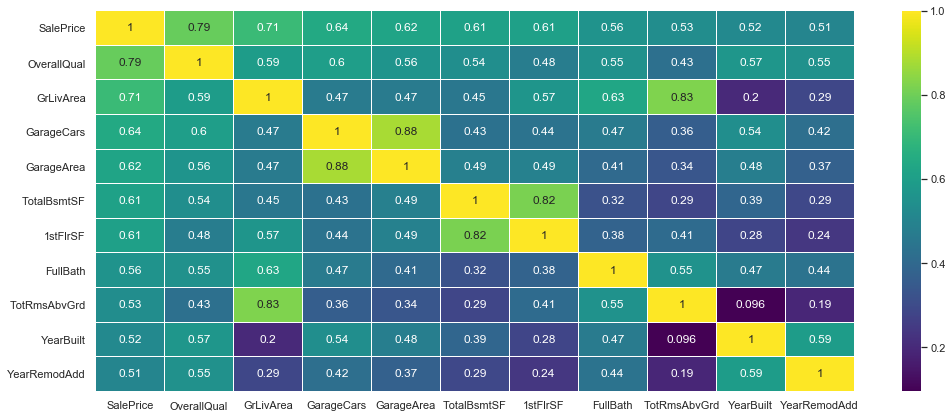

In [48]:
#cmap = sb.diverging_palette(240, 10, n=9)
#cmap = sb.cubehelix_palette()
cmap = 'viridis'
plt.figure(figsize=(17,7))
sns.heatmap(corr_numeric_high,
           linewidths=0.01, linecolor='white', annot_kws = {'size':12}, annot=True, cmap=cmap);

We clearly see the highest correlations with the Sale Price.
- OverallQual: Overall Quality
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet

#### Discrete attributes

***I will now explore the discrete attributes from the above list with the highest correlations.***

In [49]:
train_numeric[corr_numeric_high.index].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [62]:
discrete_attr_high = [attr for attr in train_numeric[corr_numeric_high.index].head().columns if len(train_numeric[corr_numeric_high.index][attr].unique())<25]
discrete_attr_high

['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']

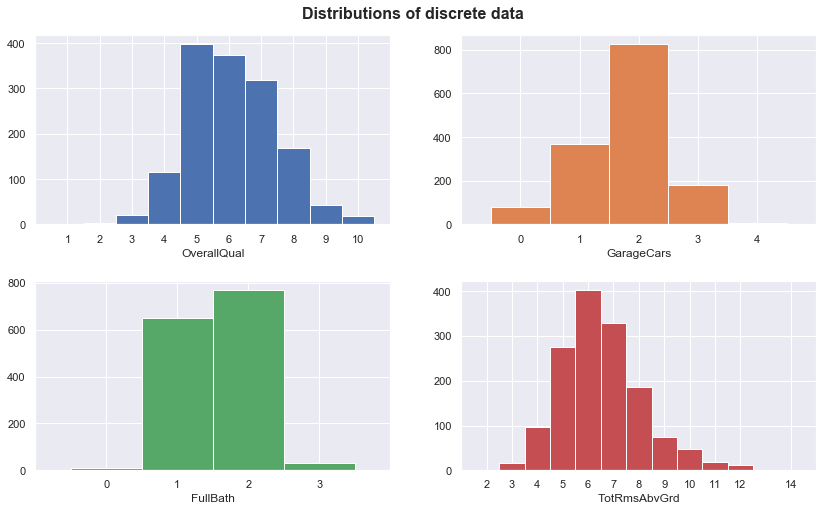

In [64]:
i = 0
j = 0
k = 0

fig, ax = plt.subplots(2,2, figsize=(14,8))
fig.suptitle('Distributions of discrete data', fontsize=16, fontweight = 'bold', y=0.93)
fig.subplots_adjust(hspace=0.3)
for attr in discrete_attr_high:
    bins = np.arange(len(train_clean[attr].unique())+2)-0.5
    ax[i,j].hist(train_clean[attr], bins=bins, color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr)
    ax[i,j].set_xticks(train_clean[attr].sort_values().unique())
    #ax[i,j].set_xticklabels(train_clean[attr].sort_values().unique())
    ax[i,j].set_xlim([train_clean[attr].unique().min()-1,train_clean[attr].unique().max()+1])
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

(1, 14)

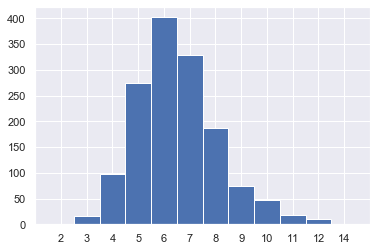

In [65]:
# Alternatively if I want to display all values next to each other.
bins = np.arange(2,16)-0.5
train_clean.TotRmsAbvGrd.hist(bins=bins)
plt.xticks(ticks=range(2,14), labels=train_clean['TotRmsAbvGrd'].sort_values().unique())
plt.xlim(1,14)

In [66]:
train_clean['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

#### Relationship of discrete data with sale price

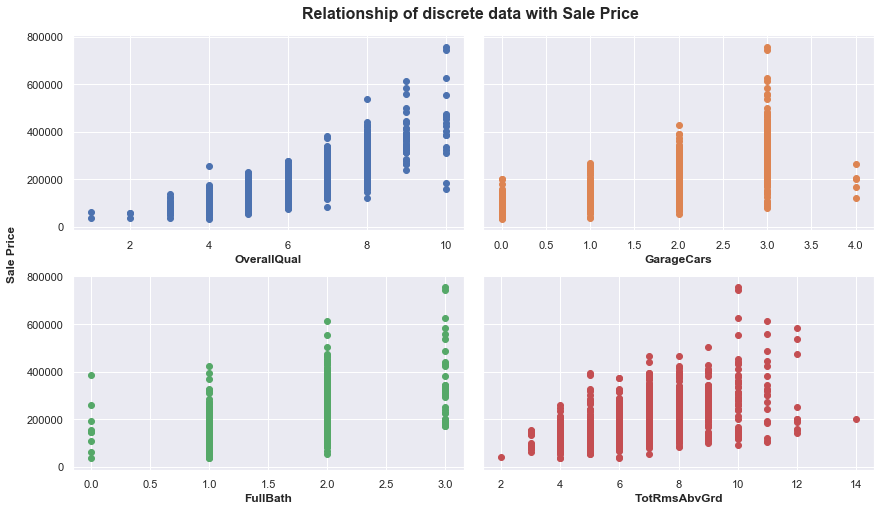

In [67]:
i = 0
j = 0
k = 0
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True)
fig.suptitle('Relationship of discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in discrete_attr_high:
    ax[i,j].scatter(train_clean[attr], train_clean['SalePrice'], color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

We notice some outliers which we can remove or not.

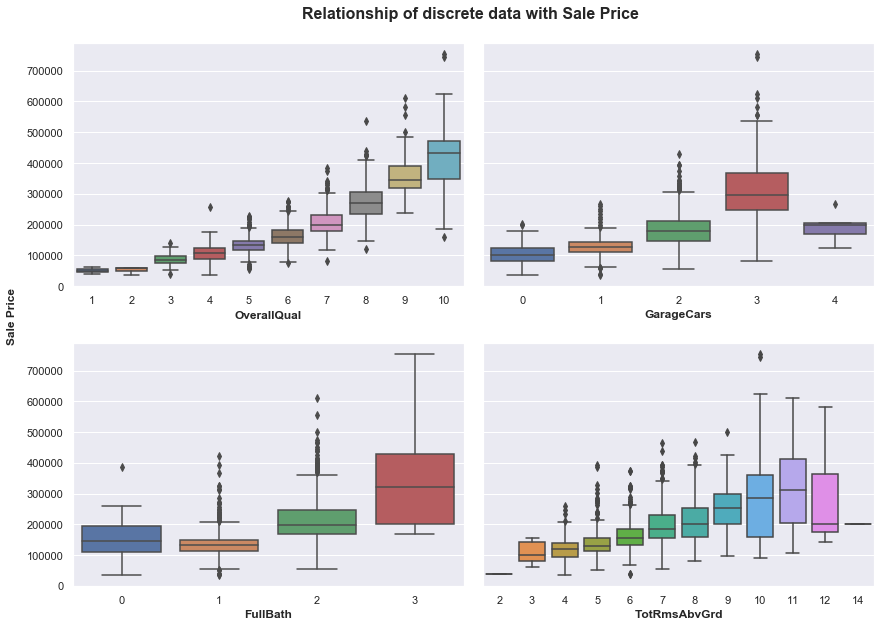

In [68]:
i = j = 0
fig, ax = plt.subplots(2,2, figsize=(14,10), sharey=True)
fig.suptitle('Relationship of discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in discrete_attr_high:
    sns.boxplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    if j==1:
        i+=1
        j=0
    else:
        j+=1

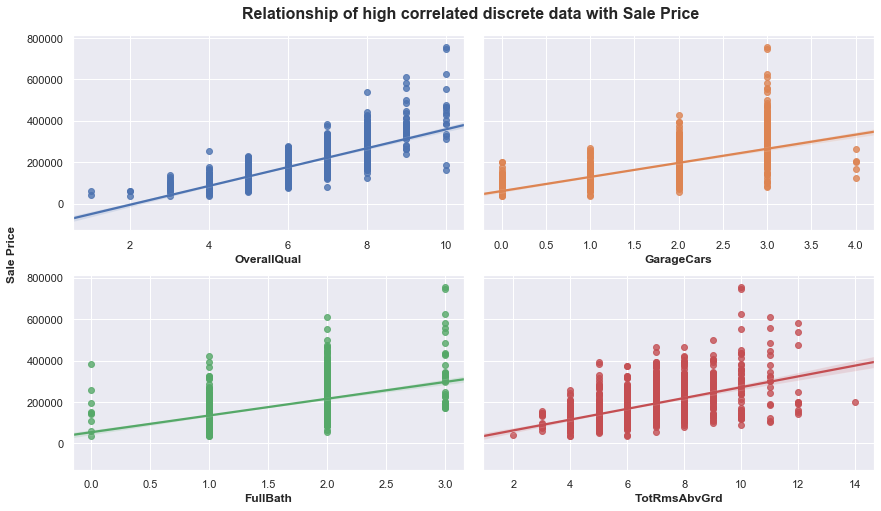

In [69]:
i = j = 0
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True)
fig.suptitle('Relationship of high correlated discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in discrete_attr_high:
    sns.regplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    if j==1:
        i+=1
        j=0
    else:
        j+=1

In [70]:
discrete_attr = [attr for attr in train_numeric.columns if len(train_numeric[attr].unique())<25]
discrete_attr

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [71]:
len(discrete_attr)

18

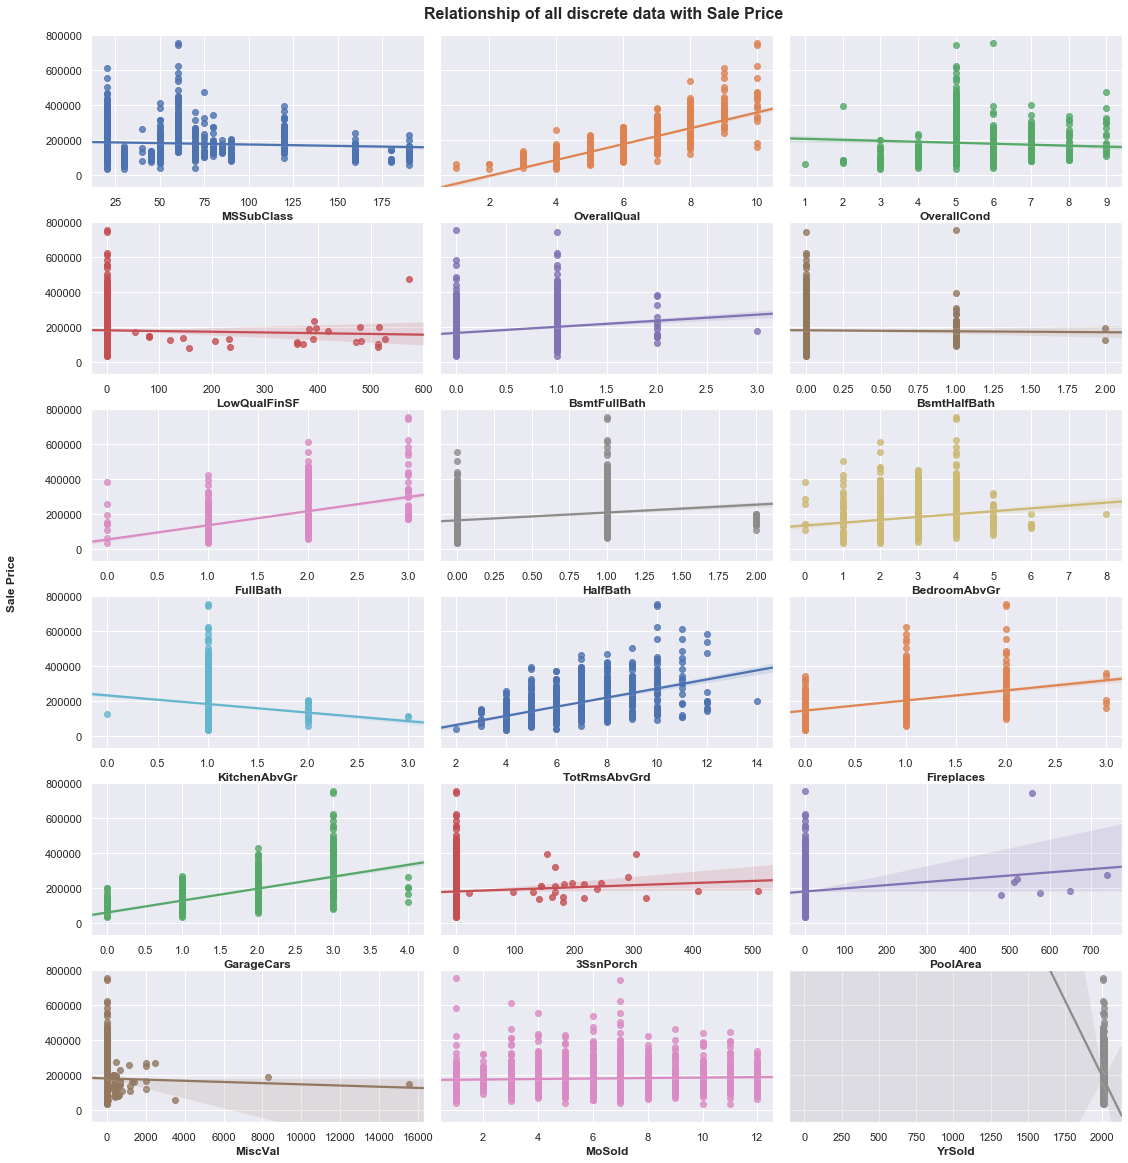

In [88]:
i = j = 0
fig, ax = plt.subplots(6,3, figsize=(18,20), sharey=True)
fig.suptitle('Relationship of all discrete data with Sale Price', fontsize=16, fontweight='bold', y=0.9)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in discrete_attr:
    sns.regplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    ax[i,j].set_ylim(-70000,800000)
    if j==2:
        i+=1
        j=0
    else:
        j+=1

#### Relationship of continuous data with sale price

In [99]:
continuous_attr = [attr for attr in train_numeric if attr not in discrete_attr]
continuous_attr

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [129]:
continuous_attr_high = [attr for attr in train_numeric[corr_numeric_high.index]
                        if attr not in discrete_attr+['SalePrice']] #+['SalePrice']
continuous_attr_high

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt',
 'YearRemodAdd']

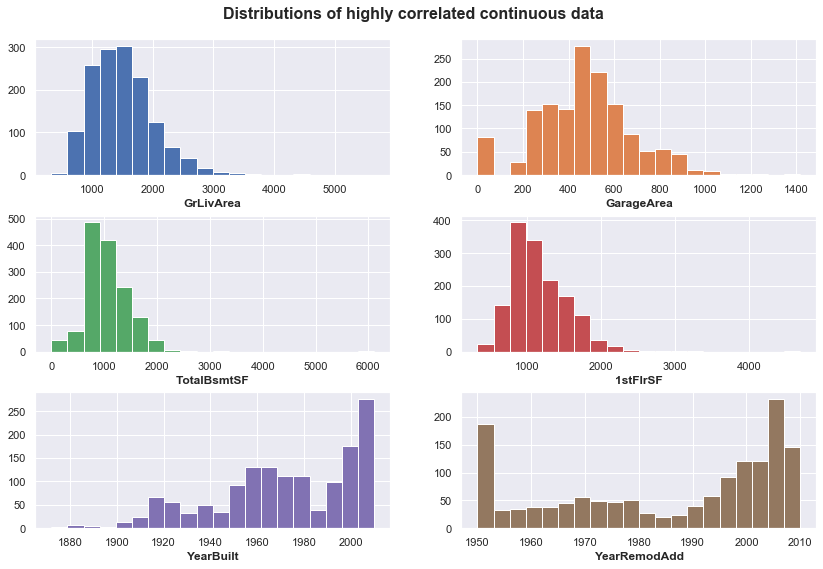

In [132]:
i = j = k = 0
fig, ax = plt.subplots(3,2, figsize=(14,9))
fig.suptitle('Distributions of highly correlated continuous data', fontsize=16, fontweight = 'bold', y=0.93)
fig.subplots_adjust(hspace=0.3)
for attr in continuous_attr_high:
    ax[i,j].hist(train_clean[attr], bins=20, color=sns.color_palette()[k])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    k+=1

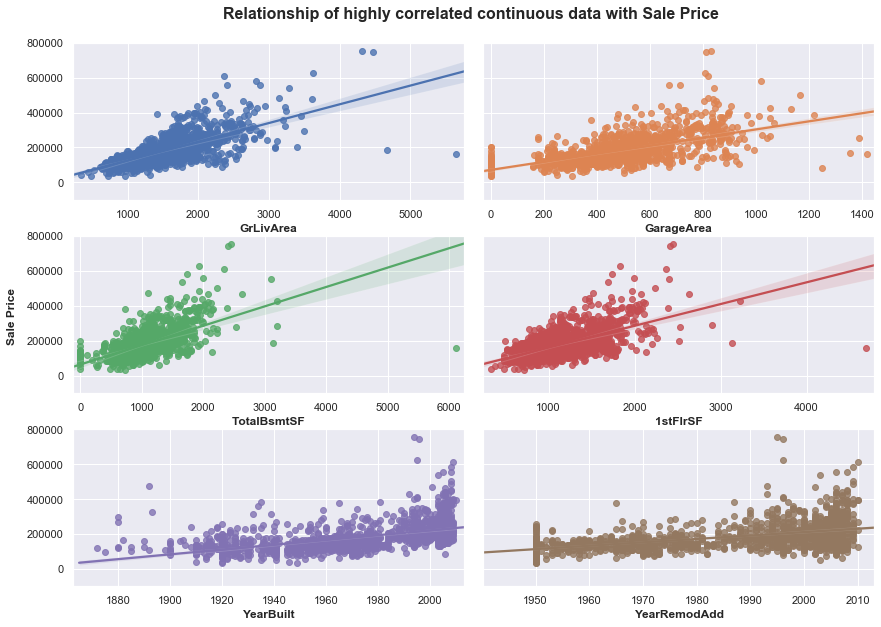

In [154]:
i = j = 0
fig, ax = plt.subplots(3,2, figsize=(14,10), sharey=True)
fig.suptitle('Relationship of highly correlated continuous data with Sale Price', fontsize=16, fontweight='bold', y=0.93)
fig.subplots_adjust(hspace=0.23, wspace=0.05, left=0.105)
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation=90, fontdict={'fontsize':12, 'fontweight':'bold'})
for attr in continuous_attr_high:
    sns.regplot(x=attr, y='SalePrice', data=train_clean, ax=ax[i,j])
    ax[i,j].set_xlabel(attr, fontsize=12, fontweight='bold')
    ax[i,j].set_ylabel('')
    ax[i,j].set_ylim(-100000, 800000)
    if (train_clean[attr].max()-train_clean[attr].min())>500:
        ax[i,j].set_xlim(train_clean[attr].min()-train_clean[attr].max()*0.02,
                         train_clean[attr].max()+train_clean[attr].max()*0.02)
    else:
        ax[i,j].set_xlim(train_clean[attr].min()*0.995,train_clean[attr].max()*1.0015)
                    
    if j==1:
        i+=1
        j=0
    else:
        j+=1

### Numerical Features

In [ ]:
# SalePrice distribution, same as plt histogram
plt.figure(figsize=(9,4))
sns.distplot(train.SalePrice);

In [ ]:
# Find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_num = train.select_dtypes(include=numerics)

#numeric_features = train.select_dtypes(include=[np.number])
#numeric_features.columns

In [ ]:
train_num.columns

In [ ]:
train_num.head()

In [ ]:
correlated = train.corr()

In [ ]:
correlated[((correlated>0.6) | (correlated<-0.6)) & (correlated!=1)]

In [ ]:
correlated[((correlated>0.6) | (correlated<-0.6)) & (correlated!=1)].count().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
#sb.heatmap(correlated);
sb.heatmap(correlated[((correlated>0.5) | (correlated<-0.5)) & (correlated!=1)]);

## Random

In [ ]:
train.iloc[:,0:5].head()

In [ ]:
# diagonal shows the distribution, the rest show scatter plots between 2 variables
sb.pairplot(train[['MSSubClass', 'LotFrontage']]);

In [ ]:
# nothing is equal to np.nan!!!
# https://stackoverflow.com/questions/41342609/the-difference-between-comparison-to-np-nan-and-isnull
np.nan == np.nan

In [ ]:
# sb dist can't plot nan values
#sb.distplot(train.GarageYrBlt);

In [ ]:
plt.hist(train.GarageYrBlt);